### 1.Explain succinctly in your own words (but working with a ChatBot if needed)...
the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former

the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms

the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)

the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form

the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes

1.Simple linear regression y=β 
0
 +β 
1
 ⋅xmodels the relationship between one independent x variable and one dependent y variable, while multiple linear regression uses multiple x variablesy=β 
0
​
 +β 
1
​
 ⋅x 
1
​
 +β 
2
​
 ⋅x 
2
​
 +⋯+β 
n
​
 ⋅x 
n

2.Continuous variables are variables that can take any value within a certain range, and indicator variables use binary values to represent categorical information.Continuous Variable in SLR 
y=β 
0
​
 +β 
1
​
 ⋅x
 Indicator Variable in SLR y=β 
0
​
 +β 
1
​
 ⋅I(x)

3.For MLR involving both continuous and indicator variables, the model creates two separate intercepts (varying according to the indicator variable) and maintains a common slope for the continuous variable in both groups.y=β 
0
​
 +β 
1
​
 ⋅x+β 
2
​
 ⋅I(z),which add an indicator 
𝐼
(
𝑧
)
I(z) to differentiate two groups 

4.The interaction term may result in different slopes for each group.y=β 
0
​
 +β 
1
​
 ⋅x+β 
2
​
 ⋅I(z)+β 
3
​
 ⋅x⋅I(z)

5.With multiple categorical variables, convert the variables into indicator variables, which predict different intercepts for each category y=β 
0
​
 +β 
1
​
 ⋅I 
1
​
 +β 
2
​
 ⋅I 
2
​
 +β 
3
​
 ⋅I 
3
​


Summary of Key Points:
https://chatgpt.com/share/6732d510-4694-8001-827b-5fa15b3c8c0f
SLR: Uses a single predictor (continuous or indicator).
MLR: Incorporates multiple predictors, allowing more complex relationships.
Interaction Term: When added, allows the slope to differ across groups.
Categorical Variables in MLR: Indicator variables represent categories, and the model compares each category to the baseline category.

### 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

outcome is the effect of a advertisement and predictor is the spending on TV advertising and the spending on online advertising.If the company spends a lot on TV ads, additional spending on online ads could have a disproportionately effect on the outcome. Without Interaction: 
Effectiveness=β 
0
​
 +β 
1
​
 ×TV_spend+β 
2
​
 ×Online_spend. The prediction results only consider the independent contribution of each variable, and the overall effect of the advertising campaign is the sum of the separate effects of TV and online advertising spending.
 With Interaction:
Effectiveness=β 
0
​
 +β 
1
​
 ×TV_spend+β 
2
​
 ×Online_spend+β 
3
​
 ×(TV_spend×Online_spend). The prediction results take into account the different effects of the combination of TV and online advertising spending.
 With Categorical (Binary) Predictors (High/Low Spend):"1" indicates high TV ad spending and "0" indicates low TV ad spending. "1" indicates high online ad spending and "0" indicates low online ad spending.
Without Interaction:
Effectiveness=β 
0
​
 +β 
1
​
 ×TV_high+β 
2
​
 ×Online_high. With Interaction:
Effectiveness=β 
0
​
 +β 
1
​
 ×TV_high+β 
2
​
 ×Online_high+β 
3
​
 ×(TV_high×Online_high)

https://chatgpt.com/share/673372d9-d444-8001-8631-4fa742ca1951
In this conversation, we discussed how to model and interpret the effects of TV and online advertising budgets on ad effectiveness, specifically for a sports equipment company. We identified the outcome variable (ad effectiveness) and predictor variables (TV and online ad spending).

### 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey

1. use Binary Logistic Regression

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

# Prepare the data
data = {
    'DEMO_age': [71, 69, 56, 54, 30, 55, 50, 52, 66, 76, 27, 49, 57, 48, 57, 54, 74, 38, 50, 73, None, None, 59, 44, 42, 63, 67, 71, 50, None, 32, 51, 67, 63, 29, 46, 28, 68, 30],
    'WELLNESS_life_satisfaction': [2, 7, 5, 4, 8, 7, 5, 5, 1, 6, 7, 6, 8, 8, 6, 9, 7, 6, 5, 4, None, 2, None, 7, 1, 1, 8, 7, 9, None, 1, 5, 8, 2, 6, 6, 6, 3, 2]
}

df = pd.DataFrame(data)

# Drop missing values
df = df.dropna()

# Create a binary outcome: 1 for satisfaction > 5, 0 for <= 5
df['satisfaction_binary'] = (df['WELLNESS_life_satisfaction'] > 5).astype(int)

# Fit the logistic regression model
model = smf.logit('satisfaction_binary ~ DEMO_age', data=df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.677776
         Iterations 4
                            Logit Regression Results                           
Dep. Variable:     satisfaction_binary   No. Observations:                   35
Model:                           Logit   Df Residuals:                       33
Method:                            MLE   Df Model:                            1
Date:                 Wed, 13 Nov 2024   Pseudo R-squ.:                0.007515
Time:                         21:48:58   Log-Likelihood:                -23.722
converged:                        True   LL-Null:                       -23.902
Covariance Type:             nonrobust   LLR p-value:                    0.5489
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0528      1.336      0.788      0.431      -1.566       3.671
DEMO_age      -0.0144

2. Multinomial Logistic Regression

In [5]:
import pandas as pd
import statsmodels.formula.api as smf

# Input data
data = {
    'DEMO_age': [71, 69, 56, 54, 30, 55, 50, 52, 66, 76, 27, 49, 57, 48, 57, 54, 74, 38, 50, 73, None, None, 59, 44, 42, 63, 67, 71, 50, None, 32, 51, 67, 63, 29, 46, 28, 68, 30],
    'WELLNESS_life_satisfaction': [2, 7, 5, 4, 8, 7, 5, 5, 1, 6, 7, 6, 8, 8, 6, 9, 7, 6, 5, 4, None, 2, None, 7, 1, 1, 8, 7, 9, None, 1, 5, 8, 2, 6, 6, 6, 3, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop missing values
df = df.dropna()

# Define categorical satisfaction levels
def categorize_satisfaction(x):
    if x <= 3:
        return 'low'
    elif x <= 6:
        return 'moderate'
    else:
        return 'high'

# Apply categorization and convert to numeric codes
df['satisfaction_level'] = pd.Categorical(df['WELLNESS_life_satisfaction'].apply(categorize_satisfaction)).codes

# Fit multinomial logistic regression model
multi_model = smf.mnlogit('satisfaction_level ~ DEMO_age', data=df).fit()
print(multi_model.summary())


Optimization terminated successfully.
         Current function value: 1.062232
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:     satisfaction_level   No. Observations:                   35
Model:                        MNLogit   Df Residuals:                       31
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                0.008861
Time:                        21:49:00   Log-Likelihood:                -37.178
converged:                       True   LL-Null:                       -37.511
Covariance Type:            nonrobust   LLR p-value:                    0.7172
satisfaction_level=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3550      1.802     -0.197      0.844      -3.886       3.176

https://chatgpt.com/share/67341933-09b4-8001-a9c2-f9d475dbd324
We explored fitting a logistic regression on WELLNESS_life_satisfaction from the Canadian Social Connection Survey dataset. Options included binary logistic regression (satisfied vs. not satisfied) and multinomial logistic regression (low, moderate, high satisfaction). When a ValueError occurred due to non-numeric categories, I provided code to convert satisfaction levels to numeric codes, enabling successful model fitting.

### 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

1. R-squared (Low Value of 17.6%)
What it measures: R-squared quantifies the proportion of the total variance in the dependent variable (e.g., HP) that is explained by the independent variables (e.g., Sp. Def and Generation) in the model.
What a low R-squared means: A low R-squared (17.6%) means that the model explains only a small fraction of the variability in the dependent variable. This suggests that there are other important factors influencing HP that are not included in the model. It could also indicate that the relationship between the predictors and the outcome is not strong or is highly variable.

2. Statistically Significant Coefficients (Large Coefficients with Strong Evidence Against the Null Hypothesis)
What p-values measure: P-values test the null hypothesis that a particular predictor has no effect on the outcome variable, controlling for other predictors. A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, suggesting that the predictor has a statistically significant relationship with the dependent variable.
What large coefficients indicate: A large coefficient (e.g., larger than 10) indicates that the predictor has a strong association with the dependent variable. For example, a coefficient of 10 for Sp. Def suggests that for each unit increase in Sp. Def, the outcome (HP) increases by 10 units, on average, while holding other predictors constant.

https://chatgpt.com/share/67341ba6-f590-8001-bd8e-a9e434190299
Here’s a summary of our interaction:

Understanding the Contradiction:
I explained that R-squared measures the proportion of variability explained by the model, while p-values and coefficients show the significance of individual predictors. The contradiction arises because these two metrics assess different aspects: R-squared shows overall model fit, and p-values show the significance of predictors, which can be strong even if the model doesn’t explain much of the total variability.
Key Takeaways:
A low R-squared means the model doesn't explain much of the data’s variability, but that doesn’t mean the predictors are unimportant — they might still be statistically significant.
Statistically significant coefficients (with large values) indicate a strong effect of the predictor, even if those predictors don't account for much of the overall variance.
Concepts Clarified:
I highlighted the difference between R-squared (explanatory power of the model) and p-values (evidence against the null hypothesis for individual predictors), clarifying that they are complementary but assess different model aspects.

### 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

Cell 1: Data Preprocessing and Train-Test Split:Imports: The code imports necessary libraries, including numpy for numerical operations and train_test_split from sklearn to split the dataset.
Train-Test Split: The dataset pokeaman is split into two parts: pokeaman_train (50% of the data) and pokeaman_test (the remaining 50%).
Handling Missing Data: Missing values in the "Type 2" column are replaced with the string 'None'.
Random Seed: A random seed is set to ensure the results are reproducible.
Output: This code creates and displays the pokeaman_train dataset, which will be used in the subsequent model fitting.

Cell 2: Simple Linear Regression Model (Attack and Defense):OLS Regression: This cell specifies and fits an ordinary least squares (OLS) regression model where the dependent variable is HP (hit points) and the independent variables are Attack and Defense.
Fit Model: The model is then fitted to the pokeaman_train dataset using the .fit() method.
Output: The .summary() method prints the regression results, showing coefficients, statistical significance, and model fit metrics.

Cell 3: Evaluate In-Sample and Out-of-Sample R-Squared:Predictions: The fitted model is used to predict HP values (yhat_model3) for the test dataset (pokeaman_test).
In-Sample R-squared: The R-squared value of the model on the training data is printed using model3_fit.rsquared. This indicates how well the model explains the variance in HP for the training data.
Out-of-Sample R-squared: The correlation coefficient between the predicted and actual HP values in the test set is computed, and the square of this correlation is printed as the "out-of-sample" R-squared. This evaluates how well the model generalizes to unseen data.

Cell 4: Multiple Linear Regression with Interactions:Model Specification: This cell defines a more complex regression model with multiple predictors and interaction terms. The formula includes interaction terms for Attack, Defense, Speed, Legendary, Sp. Def (Special Defense), and Sp. Atk (Special Attack).
The * operator in the formula includes both the main effects and interaction terms.
The Q() function ensures that certain variables (like Sp. Def and Sp. Atk) are treated as continuous rather than categorical.
Fit Model: The model is fitted using the pokeaman_train dataset.
Output: A summary of the fitted model is printed, showing coefficients and statistics for each variable and interaction term.

Cell 5: Evaluate In-Sample and Out-of-Sample R-Squared:Predictions: Similar to Cell 3, the fitted model is used to predict HP values for the test data (pokeaman_test).
In-Sample R-squared: The R-squared value on the training data is printed.
Out-of-Sample R-squared: The correlation coefficient between predicted and actual HP values for the test data is calculated and squared to obtain the out-of-sample R-squared.

https://chatgpt.com/share/67341d30-0a90-8001-948a-e3c6d764b4f0
In our conversation, you shared a series of five code cells focused on building and evaluating linear regression models using a dataset (pokeaman). Here's a brief summary:

Data Preprocessing: The dataset is split into training and test sets, with missing values in the "Type 2" column replaced by 'None'.
Simple Linear Regression Model: A simple model is fitted to predict HP (hit points) using Attack and Defense as predictors. In-sample and out-of-sample R-squared values are computed to assess model performance.
Complex Linear Regression Model: A more complex model is specified with multiple predictors and interaction terms. This model allows for a more detailed understanding of the relationships between variables and their impact on HP.
Model Comparison: Both models' R-squared values are compared to assess the improvement in fit from the simpler model to the more complex one.
The code demonstrates how to preprocess data, build linear regression models, and evaluate model performance through both in-sample and out-of-sample R-squared values, allowing for insights into the dataset's structure and the effectiveness of each model.

### 6.Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

New predictors are created by scaling and centering the Attack variable and the interaction term (*) by scale(center(Attack)). The number of rows in the design matrix is ​​equal to the number of observations (data points) in the dataset.
The number of columns is equal to the number of predictor variables. The outcome variable (model4_spec.endog) is a column vector containing the observed values ​​of the dependent variable (HP)
Multicollinearity introduces redundant information into the model, making the regression coefficients unstable and increasing the variance.
It leads to overfitting, i.e. the model fits the training data too well
As a result, the model's ability to generalize to new, unseen data is impaired and it performs poorly in an "out-of-sample" setting

https://chatgpt.com/share/673428b2-fbc8-8001-9150-0c58af59d33d
In summary, we discussed how the linear form specification and interactions in the model contribute to the design matrix, and how multicollinearity within the matrix causes instability and overfitting, ultimately hindering the model’s ability to generalize well to out-of-sample data.

### 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

model5_linear_form: adding more predictors and categorical variables compared to Model3 and Model4. model6_linear_form: adding indicator variables based on model5. model7_linear_form: the interaction is expanded to include all quadratic interaction terms, capturing more subtle relationships between variables, which will improve the fit. model7_linear_form_CS: centering and standardizing continuous variables based on model7_linear_form

https://chatgpt.com/share/67342abc-745c-8001-8652-d2ce1cb3e57f
    In our interaction, we discussed the development and extension of a series of regression models:

Model5 extends Model3 and Model4 by adding more predictors (such as Generation and Type 1) and interactions between variables. This expansion aims to improve prediction accuracy and account for a broader set of factors influencing the target variable, HP.

Model6 simplifies Model5 by focusing on significant predictors and adding indicator variables for categorical factors. This streamlines the model while maintaining its predictive power.

Model7 further refines Model6 by introducing higher-order interactions and applying scaling and centering to continuous predictors. This makes the model more robust and improves its predictions.



### 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

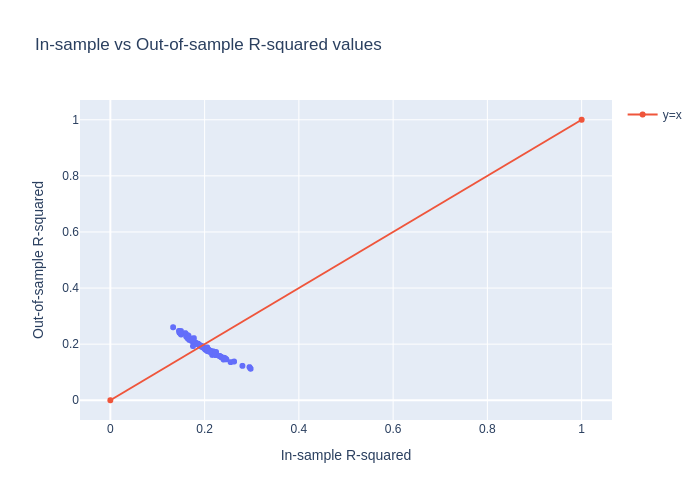

In [8]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
import plotly.graph_objects as go 

# Load the Pokémon dataset
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# Display the first few rows of the dataset to check available columns
pokeaman.head()

# Define the formula for the linear model
linear_form = 'Attack ~ Defense'

# Number of repetitions for the experiment
reps = 100

# Arrays to store R-squared values
in_sample_Rsquared = np.array([0.0]*reps)
out_of_sample_Rsquared = np.array([0.0]*reps)

# Loop to perform the repeated model fitting
for i in range(reps):
    # Randomly split the dataset (no fixed random seed)
    pokeaman_training_data, pokeaman_testing_data = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model on the training data
    final_model_fit = smf.ols(formula=linear_form, data=pokeaman_training_data).fit()
    
    # In-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Out-of-sample R-squared (on the testing data)
    out_of_sample_Rsquared[i] = np.corrcoef(pokeaman_testing_data['Attack'], final_model_fit.predict(pokeaman_testing_data))[0,1]**2

# Create a DataFrame for visualization
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Visualize the relationship between in-sample and out-of-sample R-squared values
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)", 
                 title="In-sample vs Out-of-sample R-squared values", 
                 labels={"In Sample Performance (Rsquared)": "In-sample R-squared", 
                         "Out of Sample Performance (Rsquared)": "Out-of-sample R-squared"})
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="y=x", line_shape='linear'))
fig.show(renderer="png")


In-sample R-squared reflects how well the model fits the training data. A high value means that the model explains a large portion of the variance in the training set.
Out-sample R-squared reflects how well the model generalizes to new, unseen data (the test set). A high value here means that the model is likely to be good at making predictions on new data. main purpose is to show how repeated random train-test splits can help assess the consistency of the model's performance, whether it is overfitting or underfitting

https://chatgpt.com/share/67342d9b-24f4-8001-8023-85d96093970a
summary:asked for guidance on creating a for-loop to perform repeated train-test splits, fit a model, and collect performance metrics (in-sample and out-of-sample R-squared values) for a Pokémon dataset. The goal was to assess model performance across different random splits and visualize the results to detect potential overfitting or underfitting. We discussed how the code works, the purpose of evaluating both in-sample and out-of-sample R-squared, and the insights the plot could offer regarding model generalization and stability.

### 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

This code tests the ability of a linear regression model to predict the HP (health) of a Pokémon based on its generation. It compares the model's ability to predict using the training data ("in sample") with its ability to predict using new, unseen data ("out of sample"). It does this for different subsets of the data (e.g. only generation 1 or multiple generations) and evaluates performance using a metric called R-squared, which tells us how well the model explains the data.

Here's a summary of our recent interaction:
https://chatgpt.com/share/67342e4d-417c-8001-86aa-6fc4dd6c4a3e
Data Analysis Work: You are analyzing datasets for your course project, specifically focusing on the Canadian Social Connection Survey (CSCS). You are using multiple linear regression models to examine relationships between variables, applying hypothesis testing, confidence intervals, and bootstrapping techniques.

Modeling Pokémon Data: You shared a Python code snippet where multiple linear regression models (model7 and model6) are used to predict the HP (hit points) of Pokémon based on their generation. The code calculates both in-sample and out-of-sample R-squared values to evaluate how well the models predict Pokémon data from different generations.

Clarification: I provided an explanation of how the models work, particularly focusing on the meaning of the in-sample and out-of-sample R-squared values. These metrics help assess the model's fit and generalization performance across different generations of Pokémon data.